## Train & Test Petrol Price Model : 2 Features

In [1]:
import pandas as pd 
data = pd.read_excel('Data Collection\BFP.xlsx', sheet_name='Combined')
data['Crude_Rands'] = (data.Avg_Brent_Crude * data.Ex_Rate)
data.head()

Date      BFP  Ex_Rate  Avg_Brent_Crude  Petrol  Crude_Rands
0 2010-01-01  406.263   7.5246            74.31   786.0   559.153026
1 2010-02-01  424.263   7.4735            76.84   804.0   574.263740
2 2010-03-01  430.563   7.6902            73.17   810.3   562.691934
3 2010-04-01  453.063   7.4753            78.89   858.3   589.726417
4 2010-05-01  465.063   7.3749            85.75   871.8   632.397675

#### Relationship between Petrol Price vs Oil in Rand & Ex_Rate

In [2]:
import statsmodels.formula.api as smf
import graphing # custom graphing code from Microsoft

# First, we define our formula using a special syntax
# This says that Petrol is explained by Exchange rate and Brent Crude Prices
formula = "Petrol ~ Ex_Rate + Avg_Brent_Crude"

# Perform linear regression. This method takes care of
# the entire fitting procedure for us.
model = smf.ols(formula = formula, data = data).fit()

# Show a graph of the result
graphing.scatter_3D(data,    label_x="Petrol", 
                                label_y="Avg_Brent_Crude",
                                label_z='Petrol')
#                                trendline=lambda x: model.params[1] * x + model.params[0]
#                                )

Plotly Way

In [3]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

mesh_size = .2
margin = 0


X = data[['Ex_Rate' ,'Avg_Brent_Crude']]
y = data['Petrol']

# Fit a linear regression model on the training set
model = LinearRegression().fit(X, y)

# Create a mesh grid on which we will run our model
x_min, x_max = X.Ex_Rate.min() - margin, X.Ex_Rate.max() + margin
y_min, y_max = X.Avg_Brent_Crude.min() - margin, X.Avg_Brent_Crude.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(data, x='Ex_Rate', y='Avg_Brent_Crude', z='Petrol')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



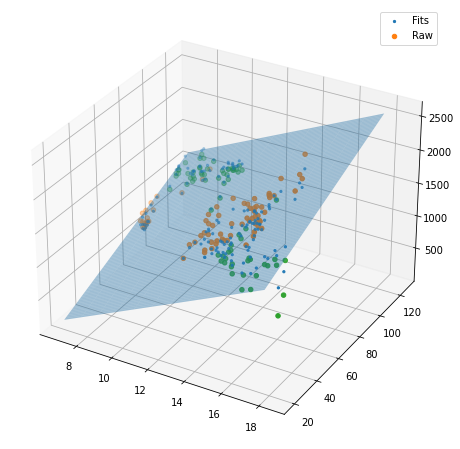

In [4]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


model = smf.ols(formula='Petrol ~ Ex_Rate + Avg_Brent_Crude', data=data)
results = model.fit()

x, y = model.exog_names[1:]

x_range = np.arange(data[x].min(), data[x].max())
y_range = np.arange(data[y].min(), data[y].max())

X, Y = np.meshgrid(x_range, y_range)

exog = pd.DataFrame({x: X.ravel(), y: Y.ravel()})
Z = results.predict(exog = exog).values.reshape(X.shape)

fig = plt.figure(figsize=plt.figaspect(1)*2)
ax = plt.axes(projection='3d')
ax.scatter(data[x].values, data[y].values, results.fittedvalues.values, 
           marker='.', label="Fits")
cond = data[model.endog_names].values > results.fittedvalues.values
ax.scatter(data[x][cond].values, data[y][cond].values, data[model.endog_names]
           [cond].values, label="Raw")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.4)
#ax.plot_surface(X, Y, np.full_like(X, ax.get_zlim()[0]), alpha = 0.2)
ax.scatter(data[x][cond == False].values, data[y][cond == False].values,
           data[model.endog_names][cond == False].values)
ax.legend()
plt.show()

Text(0.5, 0, 'Petrol Price')

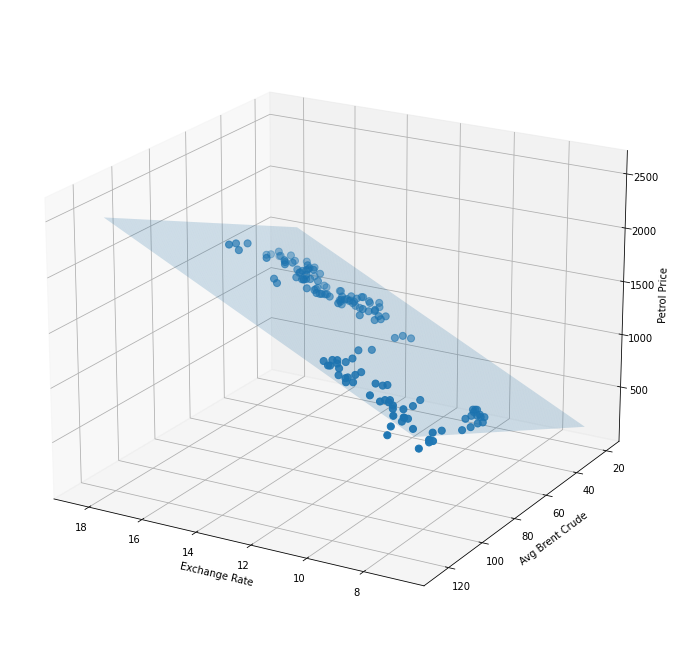

In [14]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


model = smf.ols(formula='Petrol ~ Ex_Rate + Avg_Brent_Crude', data=data)
results = model.fit()

x, y = model.exog_names[1:]
Z = results.params[0] + X*results.params[1] + Y*results.params[2]

x_range = np.arange(data[x].min(), data[x].max())
y_range = np.arange(data[y].min(), data[y].max())

X, Y = np.meshgrid(x_range, y_range)
# Z = results.fittedvalues.values.reshape()

fig = plt.figure(figsize=plt.figaspect(1)*3)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.2)

ax.scatter(data[x], data[y], data[model.endog_names], s=50)
ax.view_init(20, 120)
ax.set_xlabel('Exchange Rate')
ax.set_ylabel('Avg Brent Crude')
ax.set_zlabel('Petrol Price')

### Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split


# Obtain the label and feature from the original data
dataset = data[['Petrol', 'Ex_Rate', 'Avg_Brent_Crude']]

# Split the dataset in an 80/20 train/test ratio. We also obtain the respective corresponding indices from the original dataset.
train, test = train_test_split(dataset, train_size=0.8, random_state=21)

print("Train")
print(train.head())
print(train.shape)

print("Test")
print(test.head())
print(test.shape)

Train
     Petrol  Ex_Rate  Avg_Brent_Crude
46   1298.6   9.9452           109.12
106  1707.8  14.4892            81.15
104  1607.8  13.9430            72.51
140  1827.8  14.7700            72.50
52   1426.7  10.5576           108.31
(117, 3)
Test
     Petrol  Ex_Rate  Avg_Brent_Crude
7     816.8   7.5757            78.68
62   1126.6  11.5890            57.93
20   1018.4   7.0590           110.67
67   1325.7  12.4128            56.72
132  1486.3  14.9390            49.20
(30, 3)


In [7]:
# concatenate training and test so they can be graphed
plot_set = pd.concat([train,test])
plot_set["Dataset"] = ["train"] * len(train) + ["test"] * len(test)

# Create graph
fig = px.scatter_3d(plot_set, x='Ex_Rate', y='Avg_Brent_Crude', z='Petrol', color='Dataset')
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred))
fig.show()

### Training Set

In [17]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse

# First, we define our formula using a special syntax
formula = "Petrol ~ Ex_Rate + Avg_Brent_Crude"

# Create and train the model
model = smf.ols(formula = formula, data = train).fit()

# Graph the result against the data
fig = px.scatter_3d(train, x='Ex_Rate', y='Avg_Brent_Crude', z='Petrol')
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred))
fig.show()


In [11]:
# We use the in-buit sklearn function to calculate the MSE
correct_labels = train['Petrol']
predicted = model.predict(train[['Ex_Rate', 'Avg_Brent_Crude']])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 8793.175739 


### Test Set

In [15]:
#graphing.scatter_2D(test, "Crude_Rands", "Petrol", trendline = lambda x: model.params[1] * x + model.params[0])

# Graph the result against the data
fig = px.scatter_3d(test, x='Ex_Rate', y='Avg_Brent_Crude', z='Petrol')
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred))
fig.show()

Plotly Way

In [18]:
correct_labels = test['Petrol']
predicted = model.predict(test[['Ex_Rate', 'Avg_Brent_Crude']])

MSE = mse(correct_labels, predicted)
print('MSE = %f ' % MSE)

MSE = 19820.857932 
